In [ ]:
import torch
from torchvision import transforms

from torchvision import transforms
from torch.utils.data import DataLoader


from tools.dataset import BottleDataset


from autoencoder.autoencoder_train import train_model
from autoencoder.autoencoder_test import test_model


In [2]:


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

train_dataset = BottleDataset("dataset/bottle/train/good", transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

model = train_model(train_loader, device , num_epochs=1)


/media/cheshmeh/Project/adv_Project/MVTec /mvtec_env/lib/python3.12/site-packages/torch/cuda/__init__.py:182: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Epoch [1/1], Loss: 1.7724


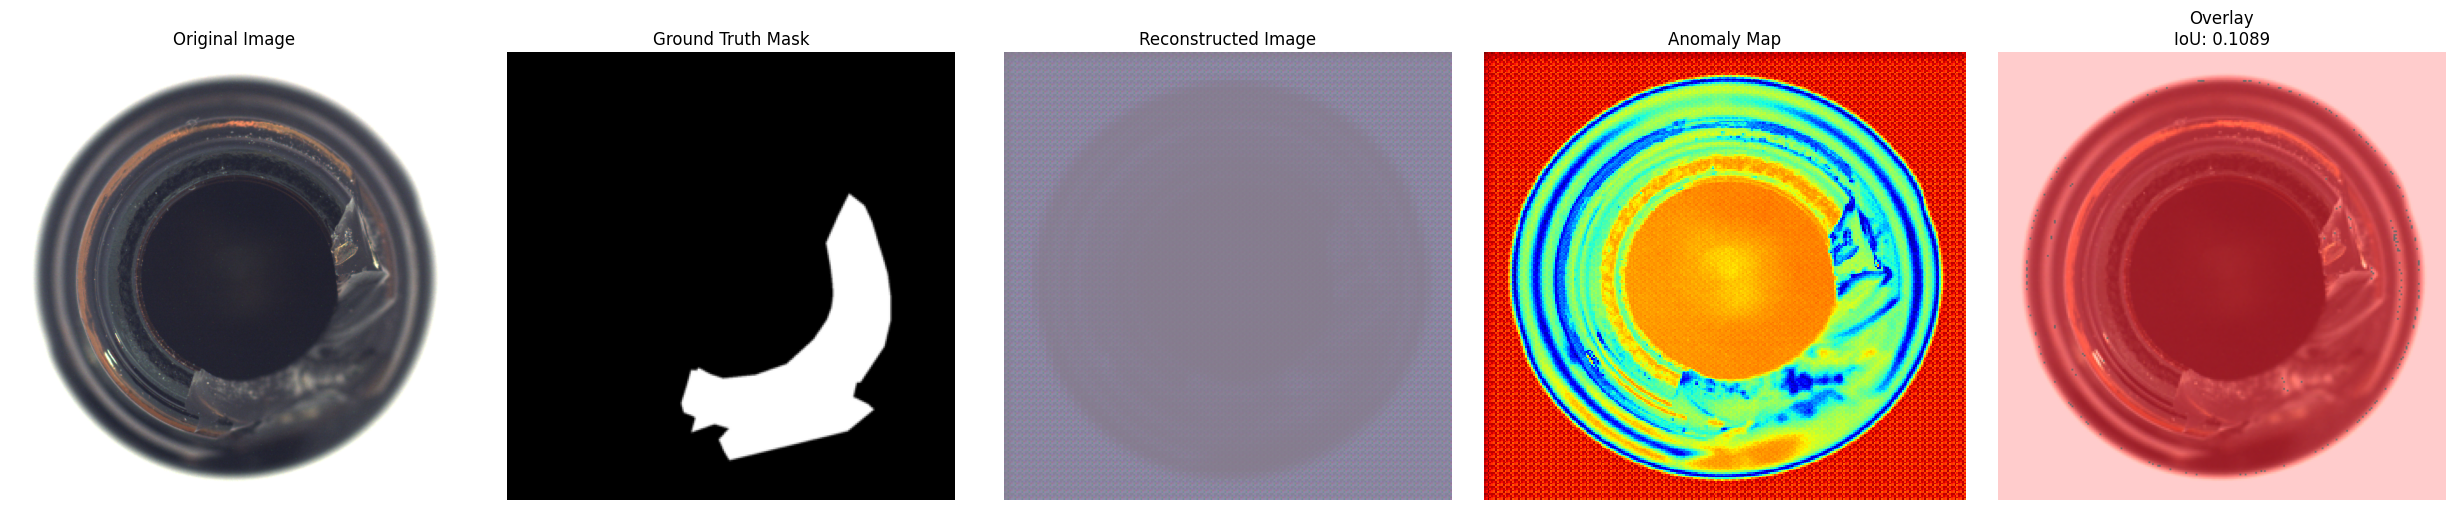

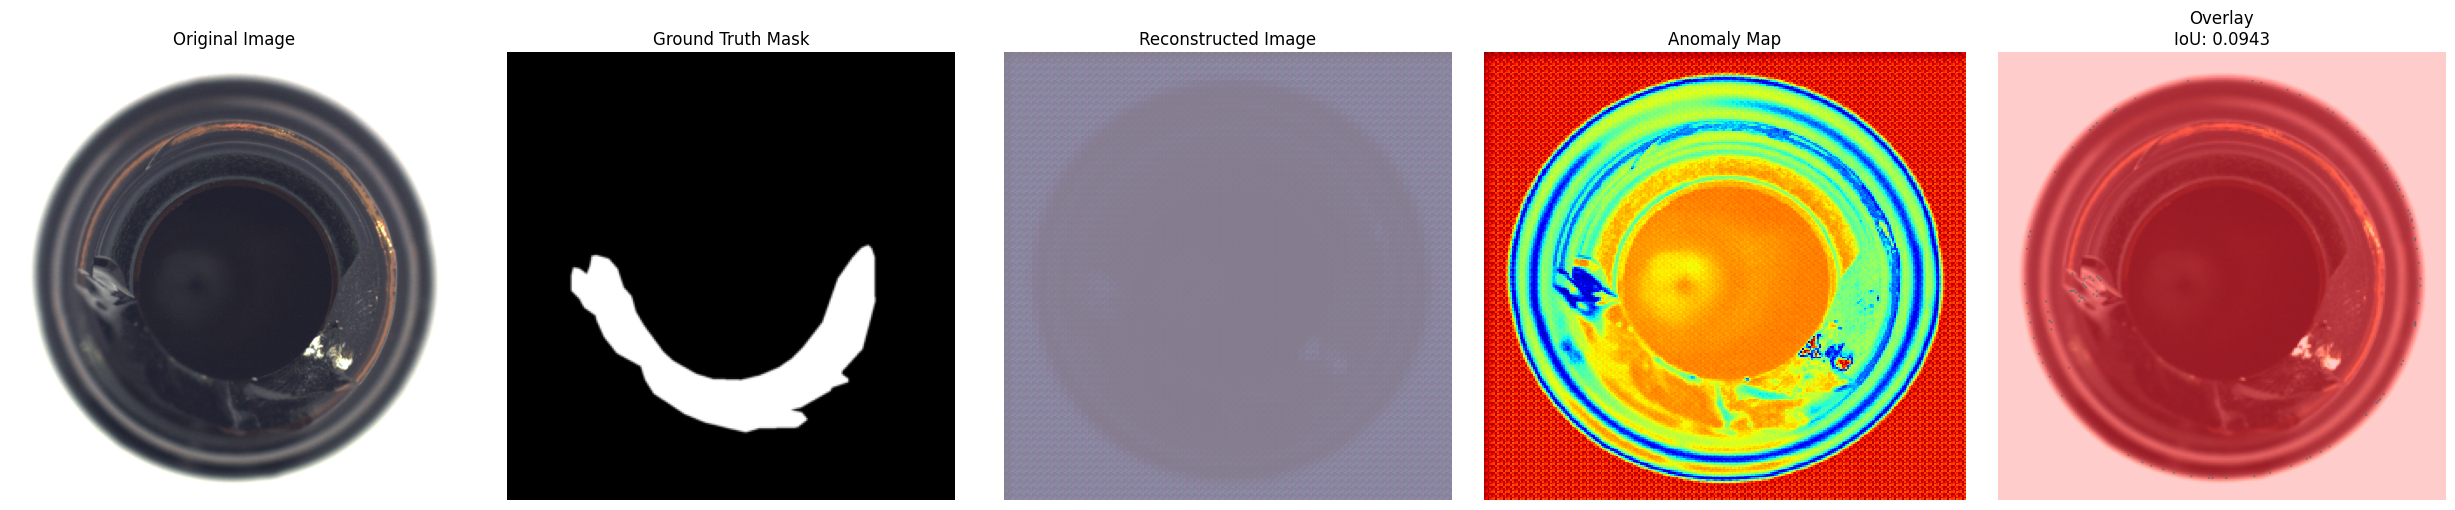

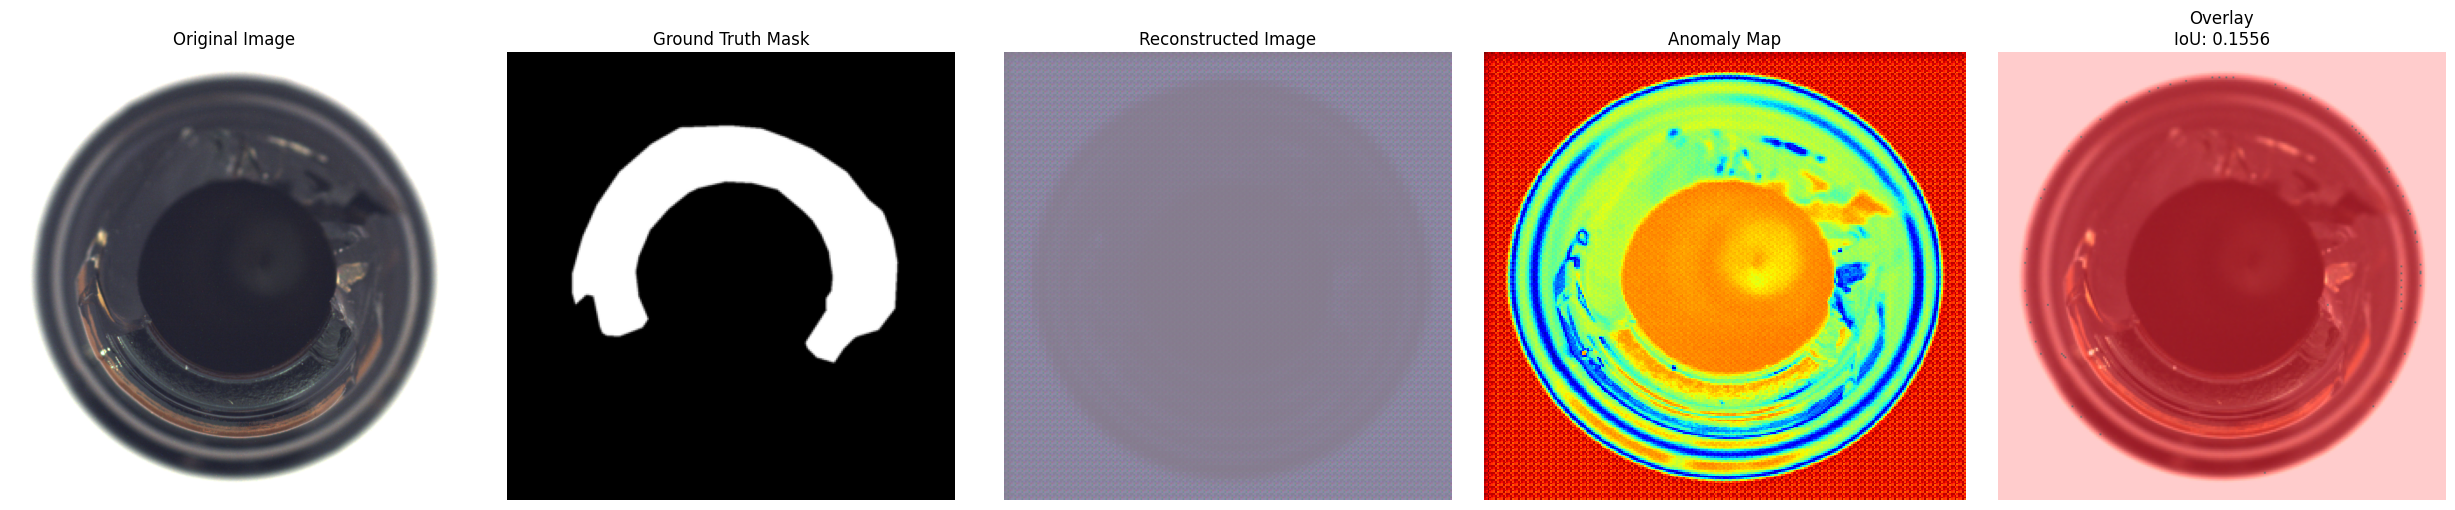

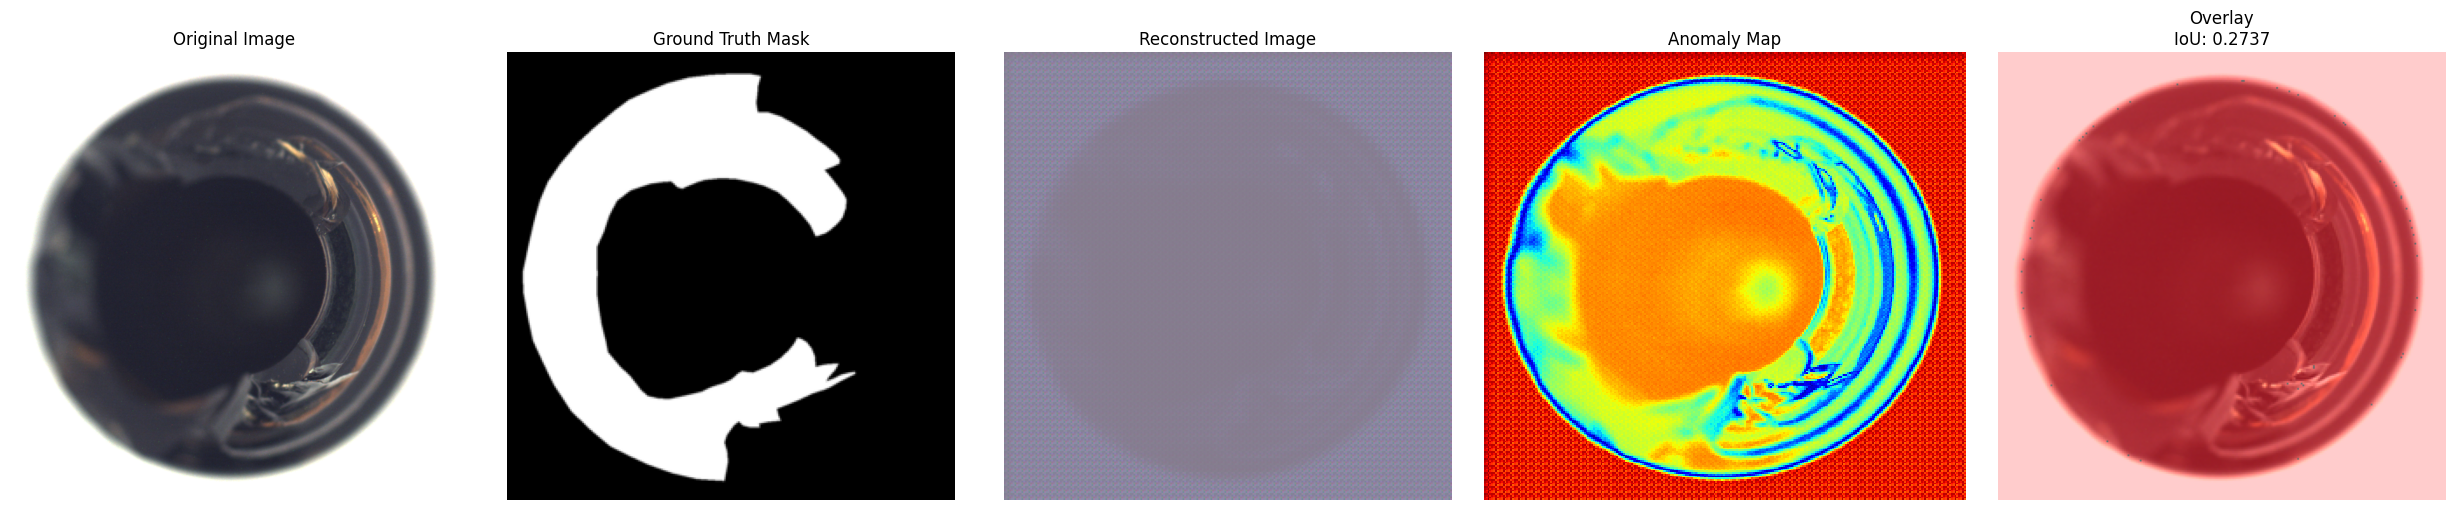

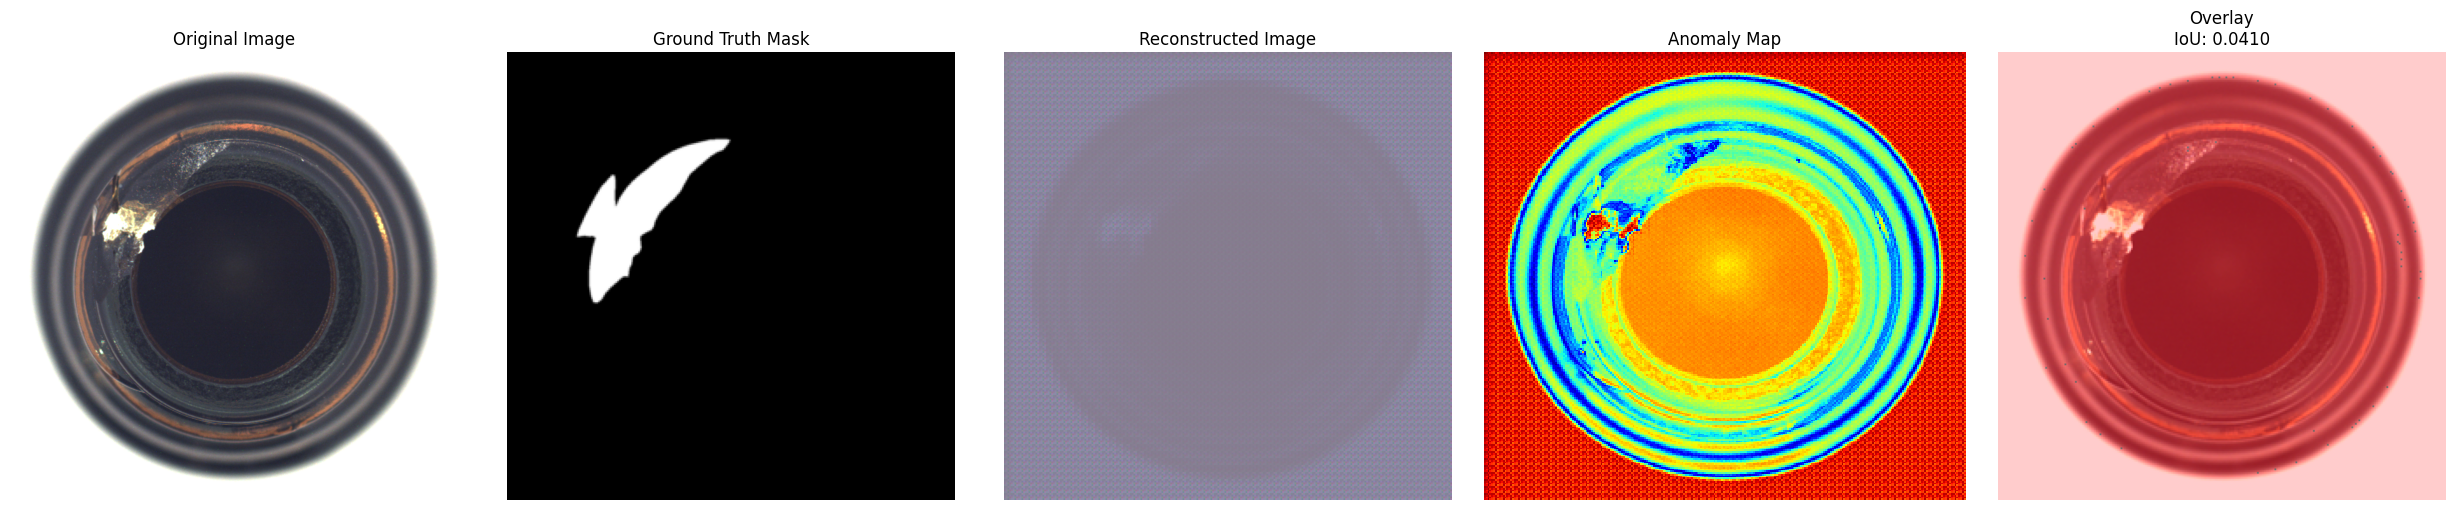

In [4]:
test_model(model, "dataset/bottle/test/broken_large", "dataset/bottle/ground_truth/broken_large", device)
